## 7. Transforming Variables in the Bike Sharing Dataset
   - Task: Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.
   - Dataset: Bike Sharing Dataset



## Data Loading



In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/bike-sharing/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##  Identify Skewed Variables

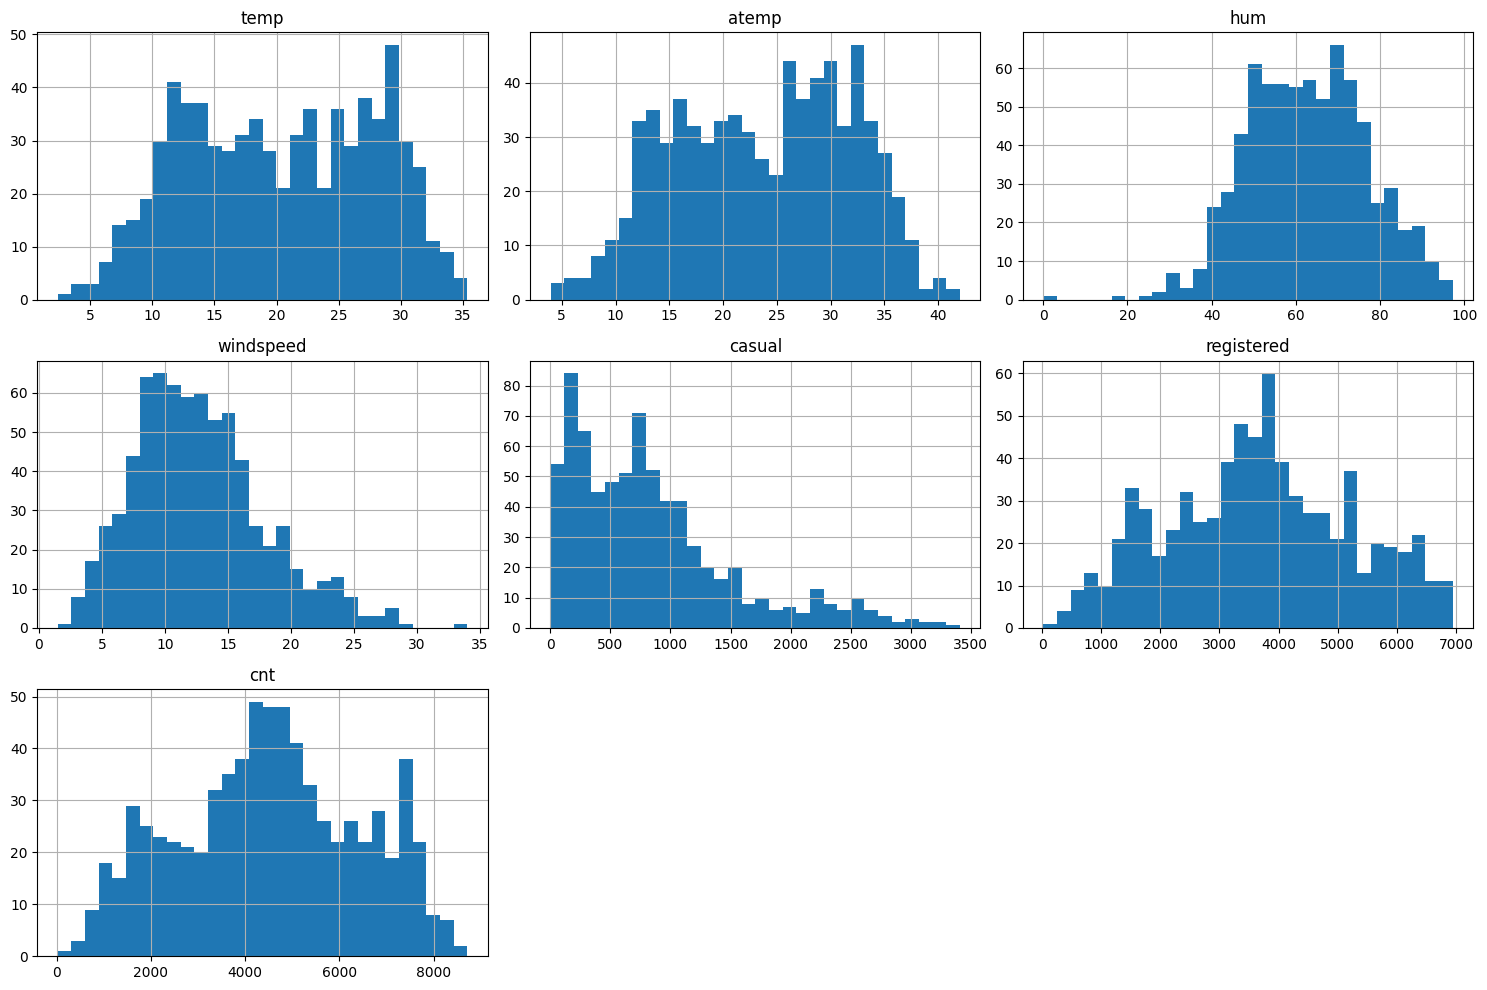

In [4]:
# Plot histograms for relevant variables
skewed_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df[skewed_vars].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


## Apply Transformations

In [5]:
# Apply log transformation, adding a small constant to avoid log(0)

df['log_casual'] = np.log1p(df['casual'])
df['log_registered'] = np.log1p(df['registered'])
df['log_cnt'] = np.log1p(df['cnt'])


In [6]:
# Apply square root transformation

df['sqrt_casual'] = np.sqrt(df['casual'])
df['sqrt_registered'] = np.sqrt(df['registered'])
df['sqrt_cnt'] = np.sqrt(df['cnt'])


In [7]:
# Apply Box-Cox transformation to windspeed and humidity

df['windspeed_boxcox'], _ = boxcox(df['windspeed'] + 1)  # Adding 1 to avoid zero values
df['hum_boxcox'], _ = boxcox(df['hum'] + 1)


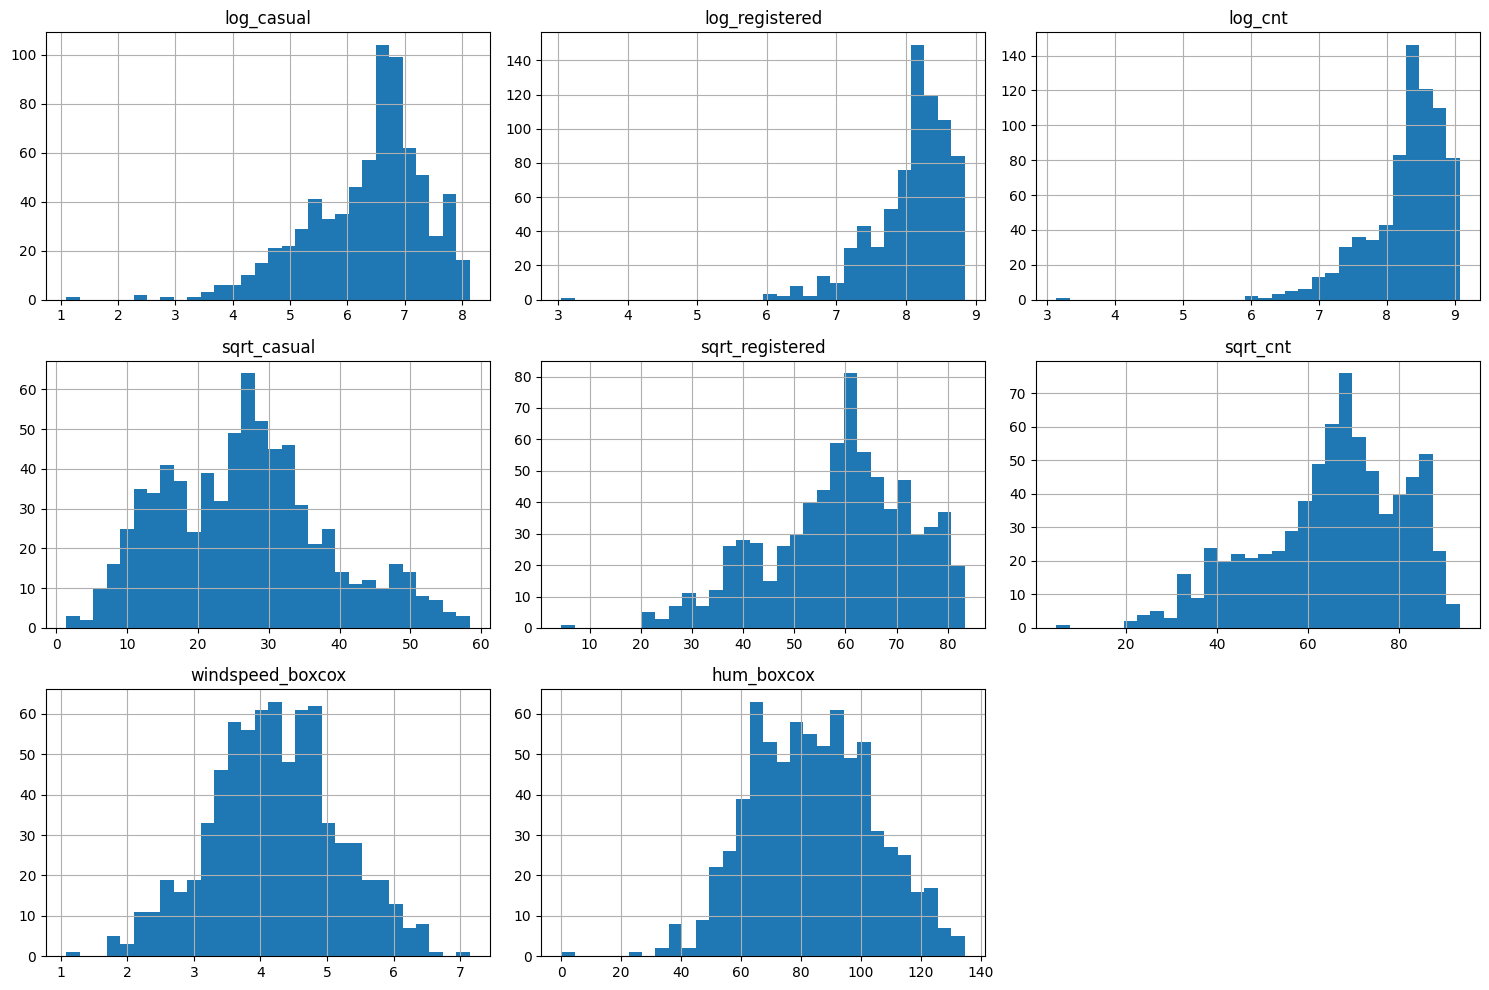

In [8]:
# Plot histograms for transformed variables

transformed_vars = ['log_casual', 'log_registered', 'log_cnt', 'sqrt_casual', 'sqrt_registered', 'sqrt_cnt', 'windspeed_boxcox', 'hum_boxcox']
df[transformed_vars].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()
